# "Signal Processing with Julia Language- Part 4"
> "Theory is nearly Implementation with Julia..."
- toc: true
- badges: true
- comments: true
- categories: [jupyter, SignalProcessing]

# Background Information

in previous posts we have seen how to create a signal with a given amplitude and sample range, as well as presented some
basic functions for signal processing. Now we are ready to put these functions to good use.

For more information, pls see the following links:

For background information, pls see [Signal Processing with Julia Language- Part I](https://gjunqueira-sys.github.io/J-J-Engineering-Blog/jupyter/signalprocessing/2021/12/27/SignalProcessingPart1.html)

In part 1 we discussed how to represent a signal, and constructor functions using my signal package in Julia.

My signal processing package can be found at [MySignalProcessing.jl](https://github.com/gjunqueira-sys/MySignalProcessing.jl)

In [6]:
#collapse-show
# Load dependencies

using MySignalProcessing
using Plots

## Plot sequence as defined by the following equation:

### $$x_1(n) = 2x(n-5) - 3x(n+4)$$

> given the signal $$x(n) = \{1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1\} \text{ , where } n= \{-2, -1 , 0 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$$

- The first part is obtained by shifting x(n) by +5  and the second part by shifting x(n) by -4. 

### 1. Lets create the given signal first:

In [7]:
x = [1,2,3,4,5,6,7,6,5,4,3,2,1]; #amplitude vector
n = [-2,-1,0,1,2,3,4,5,6,7,8,9,10]; #sample position vector
s = signal(x,n)  # create signal from the two vectors

signal(Real[1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1], Real[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

### 2. We can break it down the process in parts , just to visualize better:

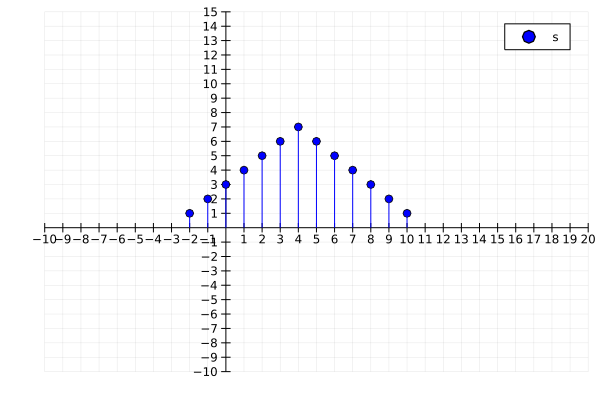

In [18]:
#collapse-show
# Original signal
p1 = plot(s.n, s.A, line =:stem, marker=:o, color=:blue, label = "s", ylims = (-10,15), 
xlims=(-10,20), framestyle = :origin,xtick=-10:20,ytick=-10:15)



In [19]:
# First part of expression: shift and multiple by 2
x₂ = 2.0 * ( s |> sigshift(5) ) ;

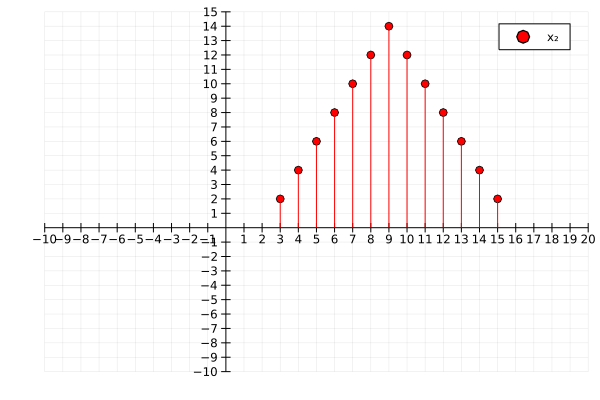

In [20]:
#collapse-show
plot(x₂.n, x₂.A, line =:stem, marker=:o, color=:red, label = "x₂", ylims = (-10,15), 
xlims=(-10,20), framestyle = :origin, xtick=-10:20, ytick=-10:15)

In [21]:
# second part of expression: shift and multiple by -3
x₃ = -3.0 * ( s |> sigshift(-4) ) 

signal(Real[-3.0, -6.0, -9.0, -12.0, -15.0, -18.0, -21.0, -18.0, -15.0, -12.0, -9.0, -6.0, -3.0], Real[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6])

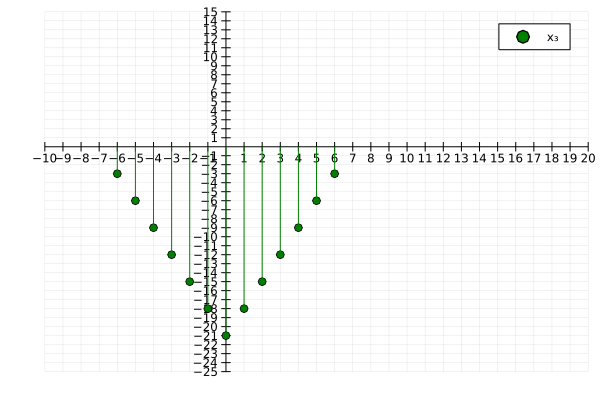

In [22]:
plot(x₃.n, x₃.A, line =:stem, marker=:o, color=:green, label = "x₃", ylims = (-25,15), 
xlims=(-10,20), framestyle = :origin, xtick=-10:20, ytick=-25:15)

### 3. Add the two signals x₂ and x₃ together:

In [24]:
x₁ = x₂ + x₃

signal(Real[-3.0, -6.0, -9.0, -12.0, -15.0, -18.0, -21.0, -18.0, -15.0, -10.0  …  5.0, 10.0, 12.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0], Real[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

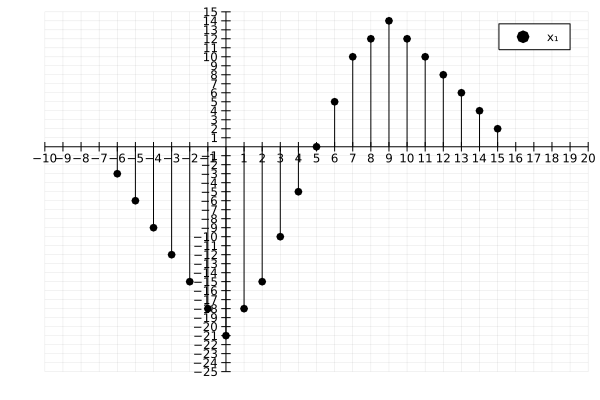

In [37]:
#collapse-show
plot(x₁.n, x₁.A, line =:stem, marker=:o, color=:black, label = "x₁", ylims = (-25,15), 
xlims=(-10,20), framestyle = :origin, xtick=-10:20, ytick=-25:15)

### 4. Off course , we could have just written everything at once, just like the theory:

```julia

x₁ = 2.0 * ( s |> sigshift(5) ) + (-3.0) * ( s |> sigshift(-4) )
```

In [32]:
x₁ = 2.0 * ( s |> sigshift(5) ) + (-3.0) * ( s |> sigshift(-4) )

signal(Real[-3.0, -6.0, -9.0, -12.0, -15.0, -18.0, -21.0, -18.0, -15.0, -10.0  …  5.0, 10.0, 12.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0], Real[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

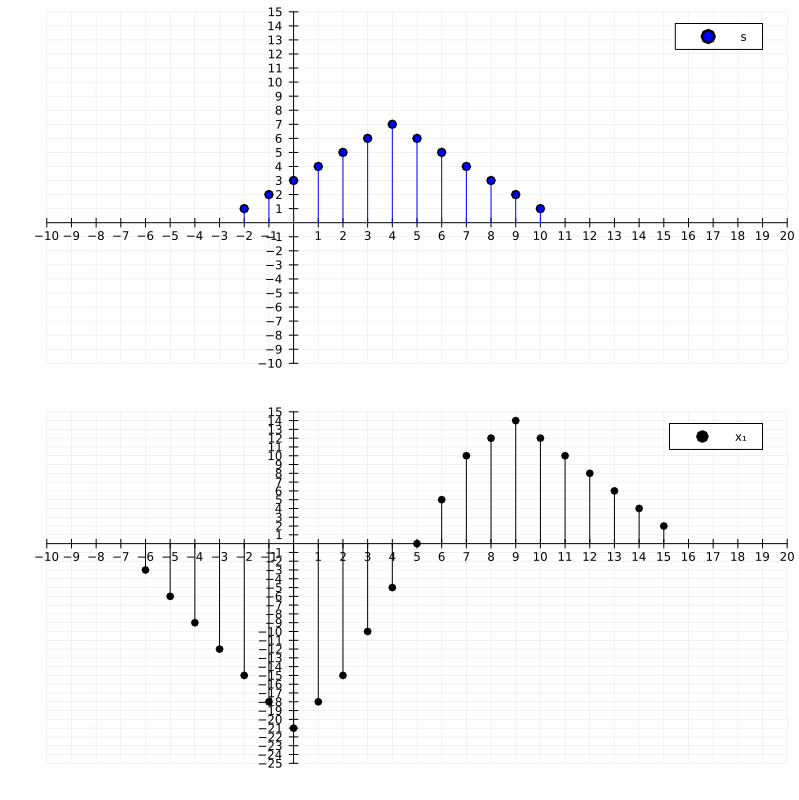

In [36]:
#collapse-show

p1 = plot(s.n, s.A, line =:stem, marker=:o, color=:blue, label = "s", ylims = (-10,15), 
xlims=(-10,20), framestyle = :origin, xtick=-10:20, ytick=-10:15);

p2 = plot(x₁.n, x₁.A, line =:stem, marker=:o, color=:black, label = "x₁", ylims = (-25,15), 
xlims=(-10,20), framestyle = :origin, xtick=-10:20, ytick=-25:15);

plot(p1,p2, layout = (2,1), size = (800,800))